In [54]:
import pandas as pd
import librosa.display
import librosa
import numpy as np
import matplotlib.pyplot as plt
import glob
import random
import json
import os

In [2]:
PATH_DATA = './data/audio_mnist/'
INFO_PATH = PATH_DATA + 'audioMNIST_meta.txt'

In [3]:
INFO = json.load(open(INFO_PATH))

In [4]:
random.seed(2022)
np.random.seed(2022)

In [5]:
female_speakers = []
male_speakers = []
for speaker in INFO.keys():
    if INFO[speaker]['gender'] == 'female':
        female_speakers.append(speaker)
    else:
        male_speakers.append(speaker)

In [47]:

digits = ['7', '0', '6', '9', '8', '3', '5', '1', '4', '2']

In [48]:
SR = 16000
N_FFT = 512
HOP_LENGTH = 160

In [49]:
female = random.choice(female_speakers)
male = random.choice(male_speakers)

In [50]:
female_samples = []
male_samples = []
for digit in digits:
    female_samples.append(random.choice(glob.glob(PATH_DATA + female + '/' + digit + '*')))
    male_samples.append(random.choice(glob.glob(PATH_DATA + male + '/' + digit + '*')))

In [55]:
def plot_spectrogram(path_to_sample):
    y, sr = librosa.load(path_to_sample, sr=SR)
    y_stft = librosa.stft(y=y, n_fft=N_FFT, hop_length=HOP_LENGTH)
    y_spec = np.abs(y_stft) ** 2
    y_log_db = librosa.power_to_db(y_spec)

    digit = path_to_sample.split('/')[-1].split('_')[0]
    speaker = path_to_sample.split('/')[-2]
    plt.figure(figsize=(16,4))
    plt.suptitle('Digit %s' % digit)
    plt.subplot(1,2,1)
    librosa.display.specshow(y_log_db,
                            sr=SR,
                            hop_length=HOP_LENGTH,
                            x_axis='time',
                            y_axis='linear')
    plt.colorbar(format='%+2.f')
    plt.title('Spectrogram')

    y_mel = librosa.feature.melspectrogram(y=y, sr=SR, n_fft=N_FFT, hop_length=HOP_LENGTH,win_length=400,n_mels=80)
    y_mel_log_db =  librosa.power_to_db(y_mel)
    plt.subplot(1,2,2)
    librosa.display.specshow(y_mel_log_db,
                            sr=SR,
                            hop_length=HOP_LENGTH,
                            x_axis='time',
                            y_axis='mel')
    plt.colorbar(format='%+2.f')
    plt.title('Mel-spec (Input)')
    if not os.path.exists('fig/' + speaker):
        os.mkdir('fig/' + speaker)
    plt.savefig('fig/%s/%s.png' %(speaker, digit))

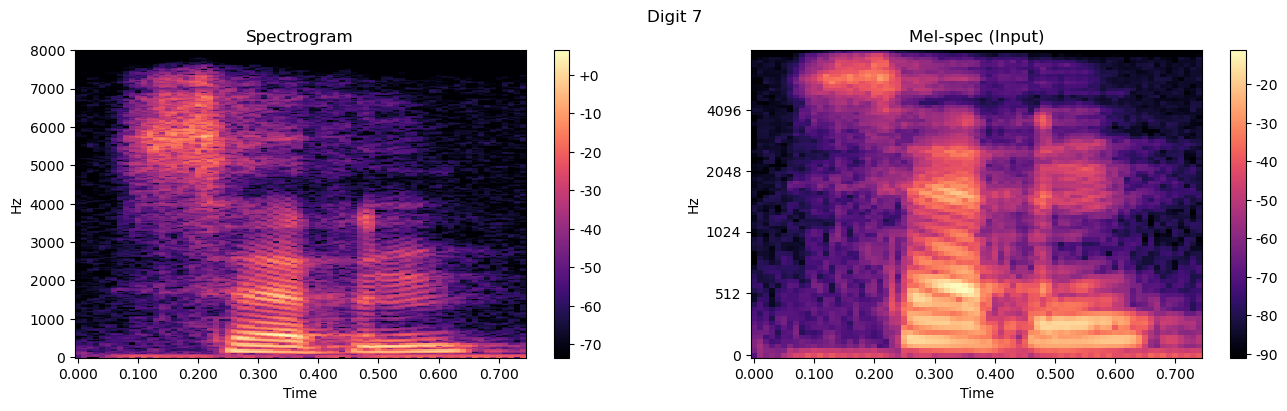

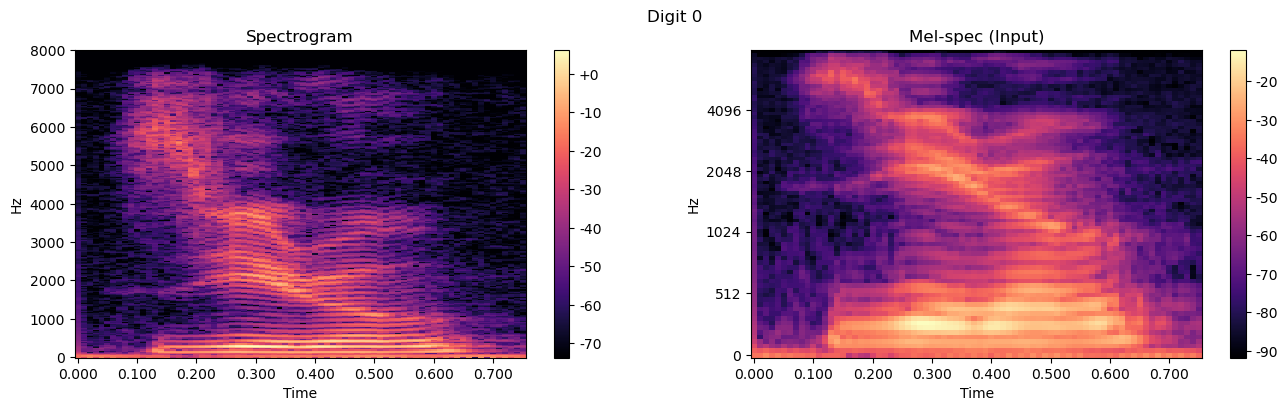

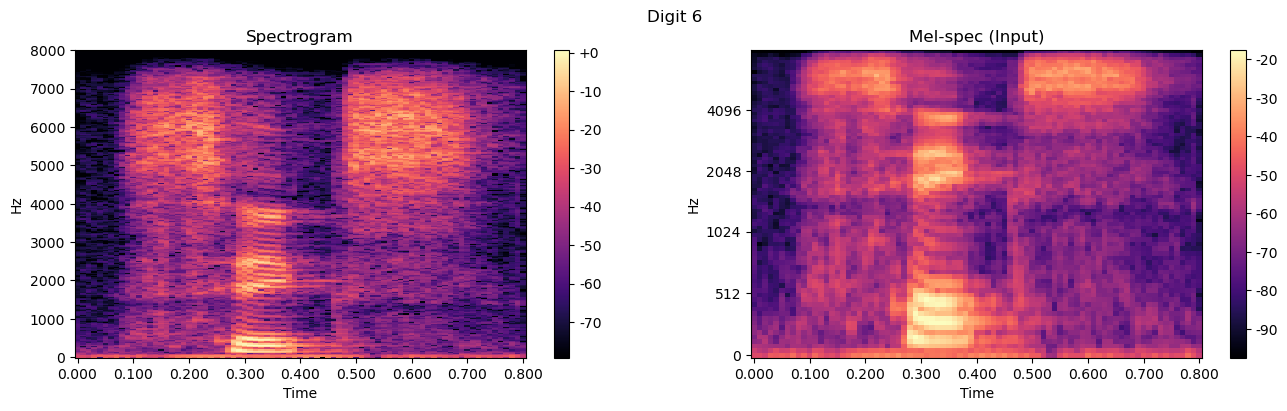

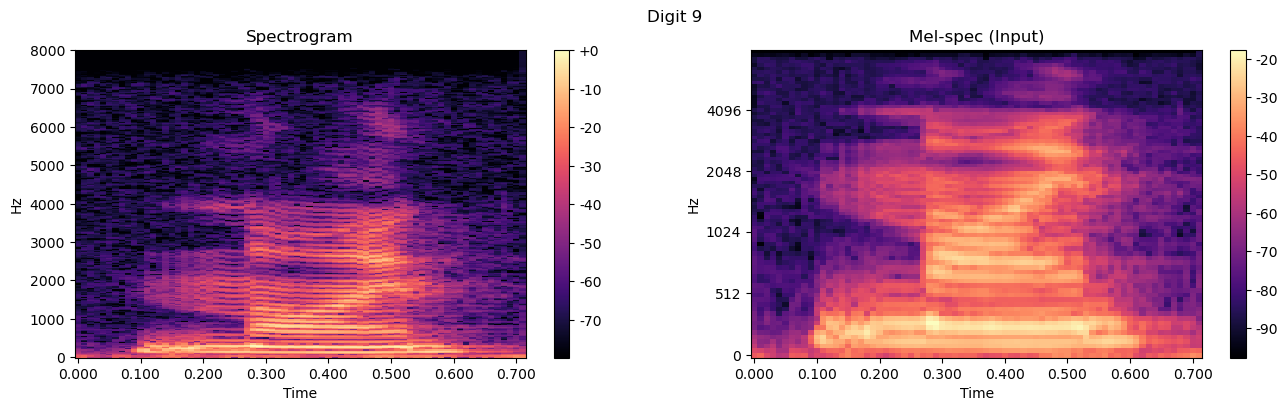

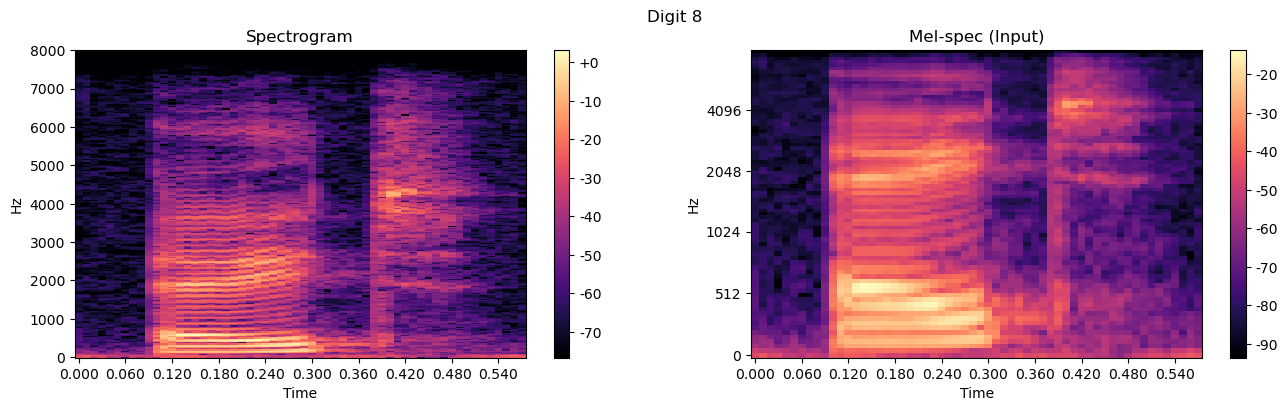

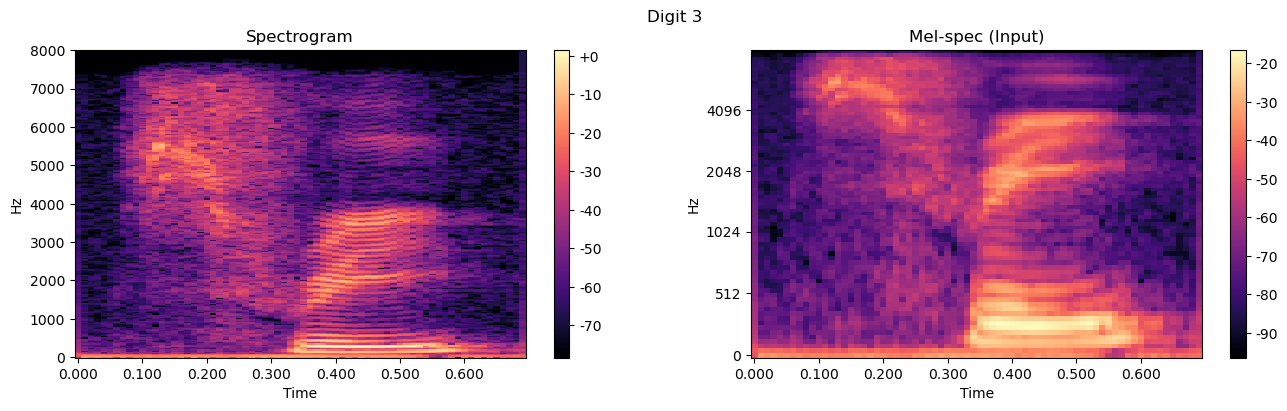

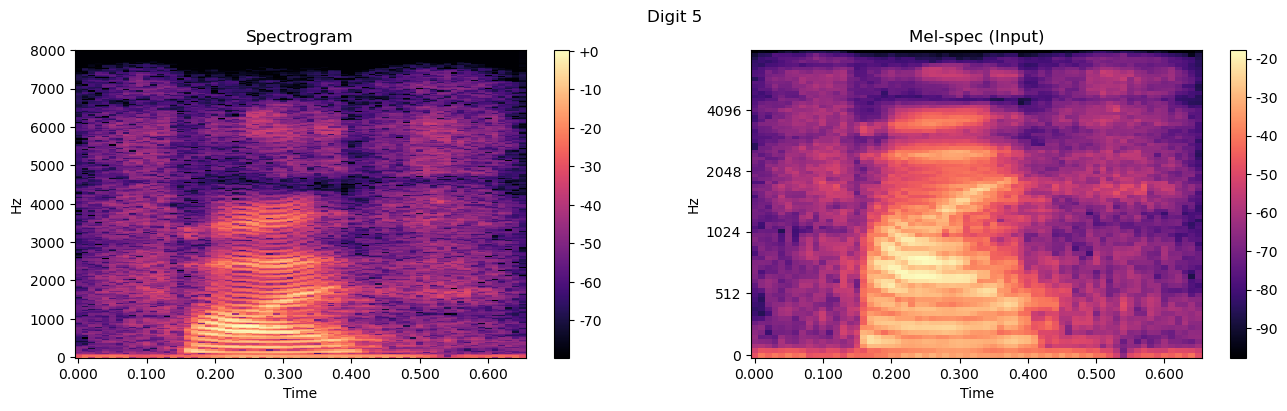

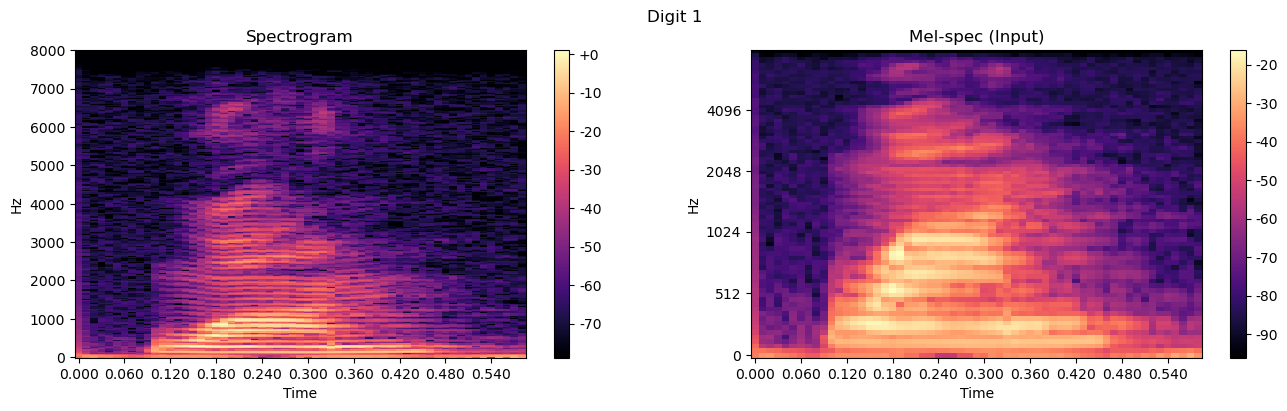

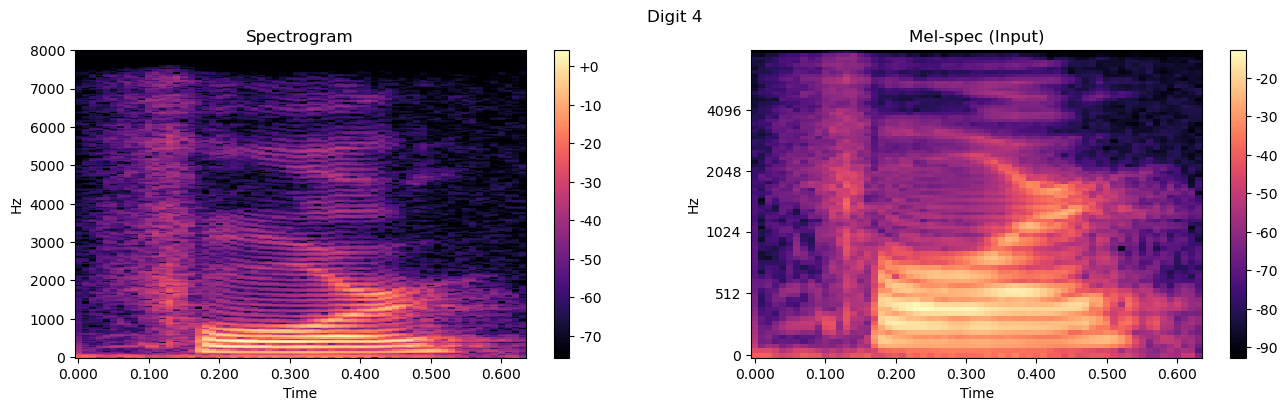

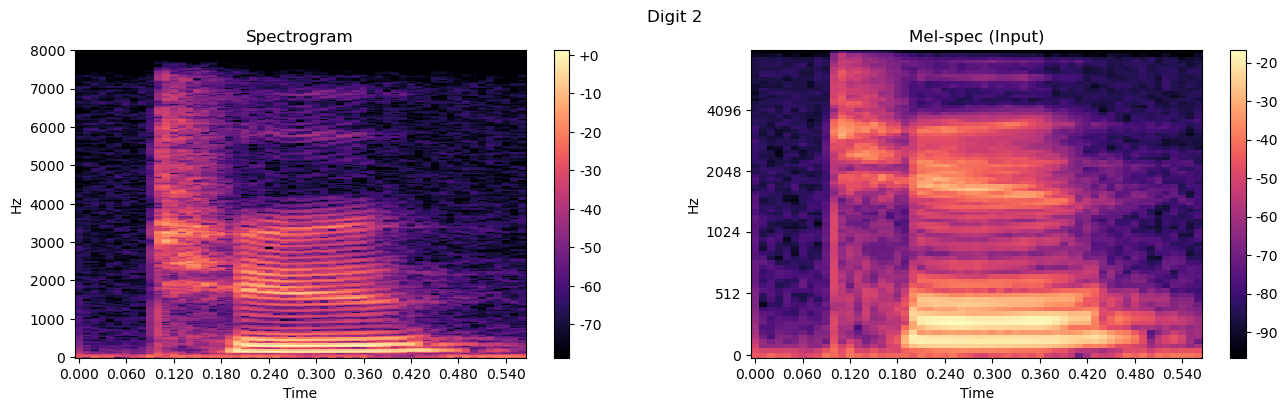

In [56]:
for sample in male_samples:
    plot_spectrogram(sample)

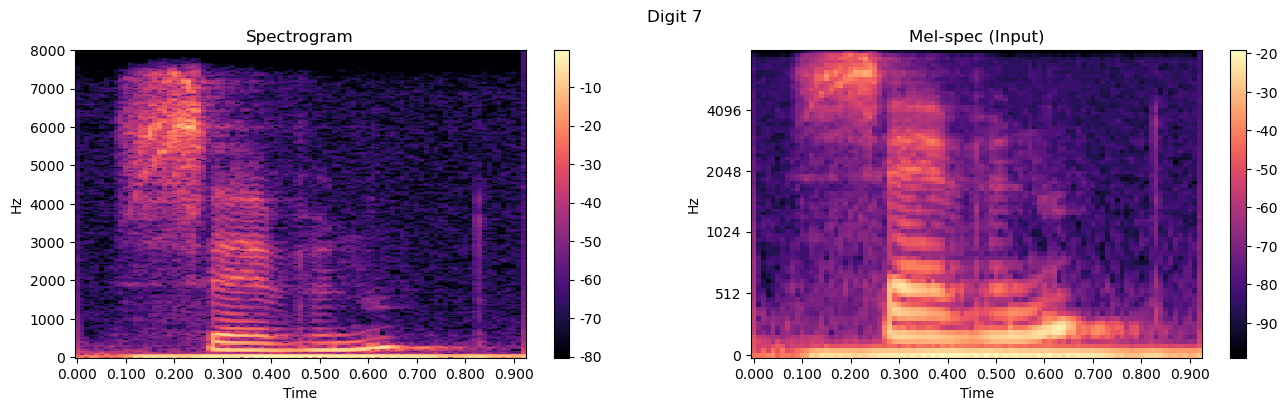

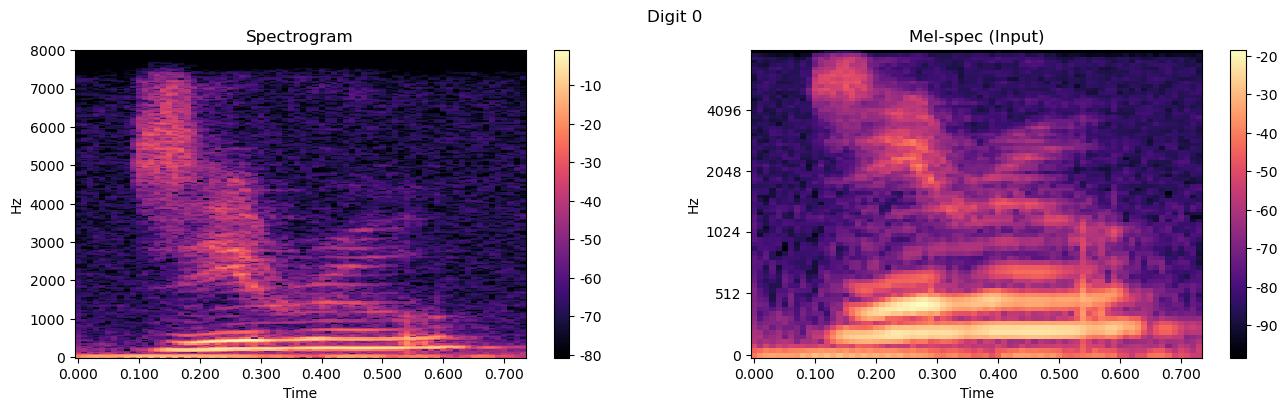

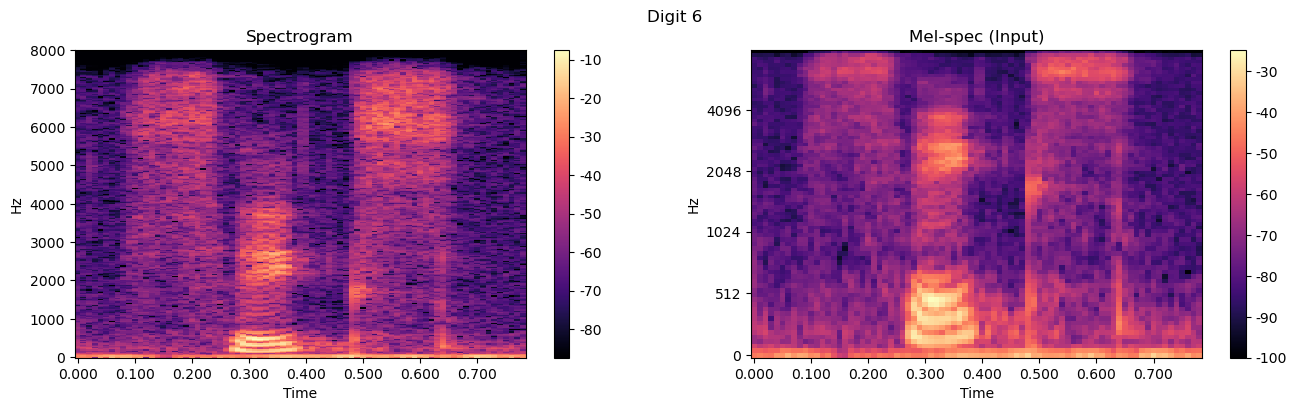

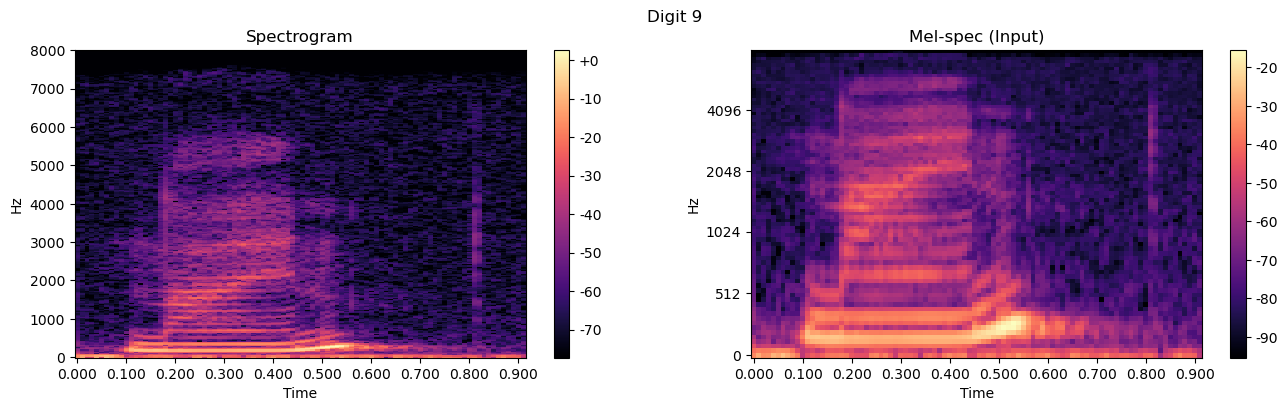

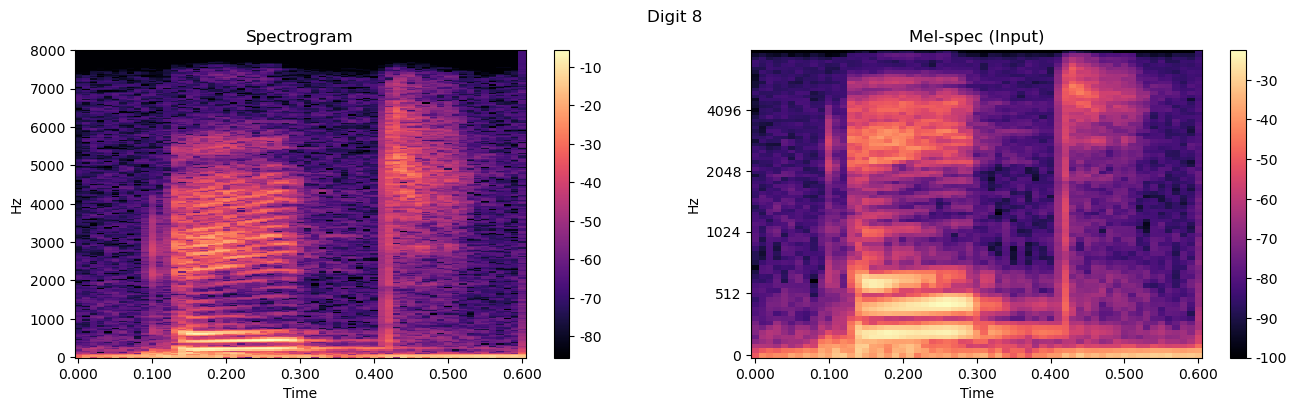

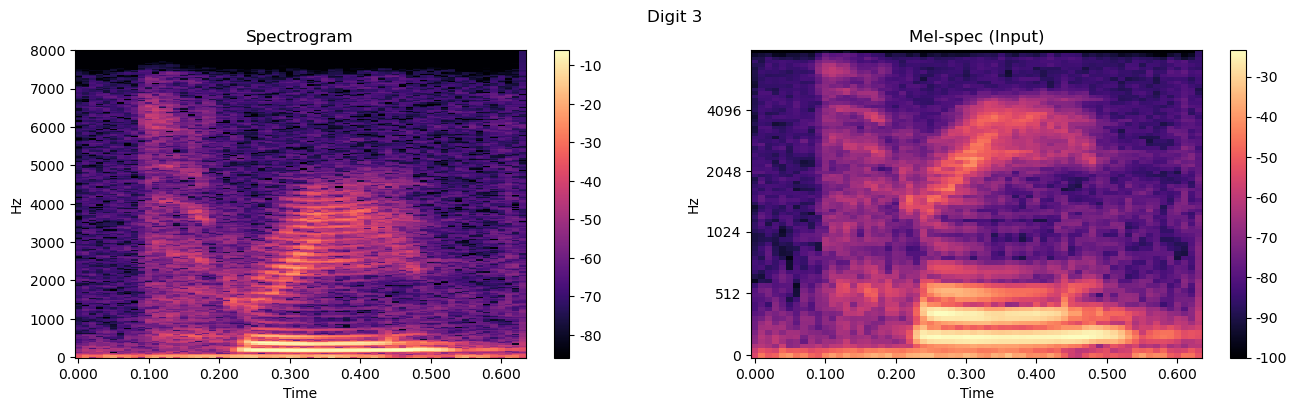

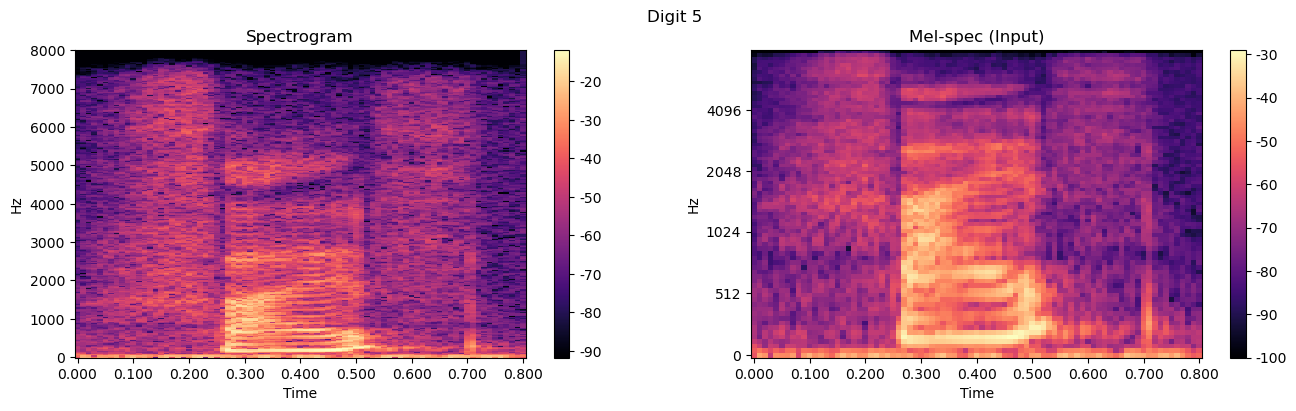

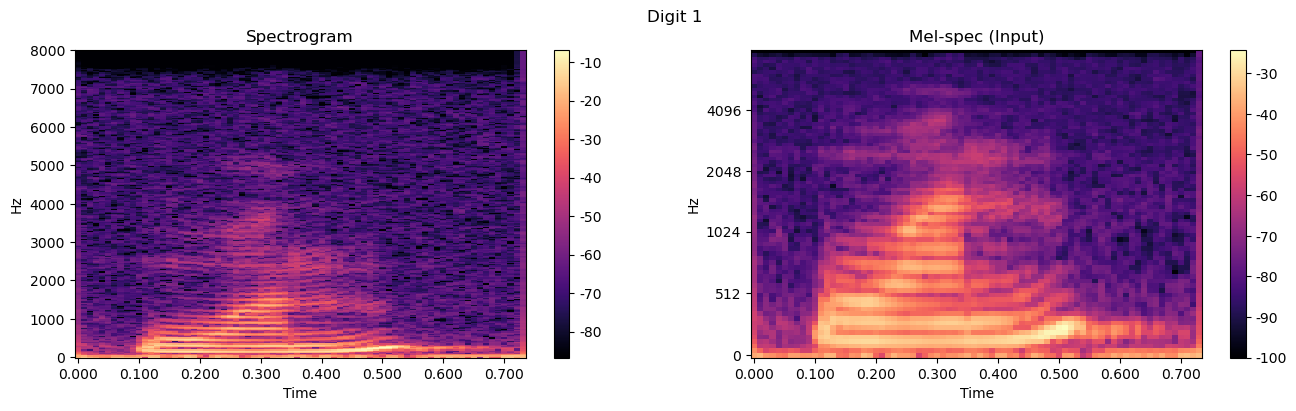

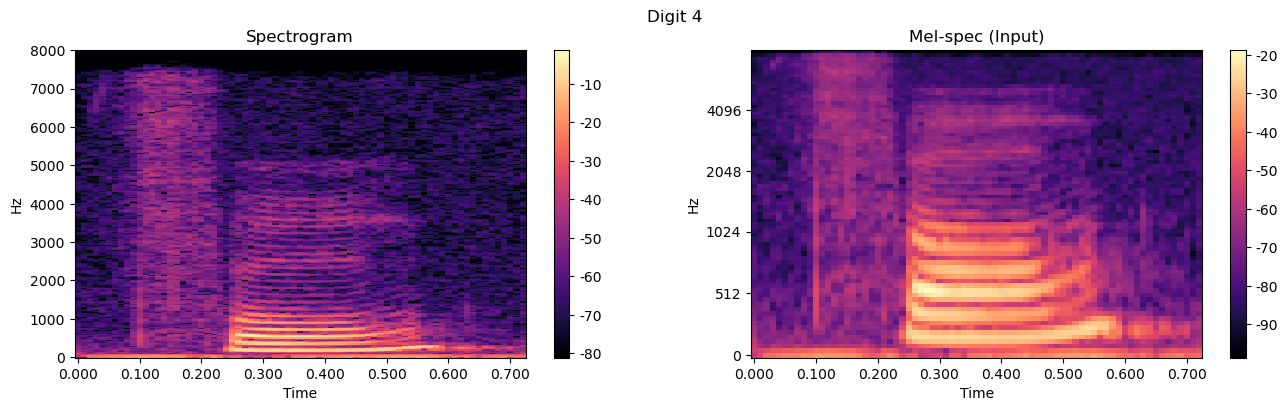

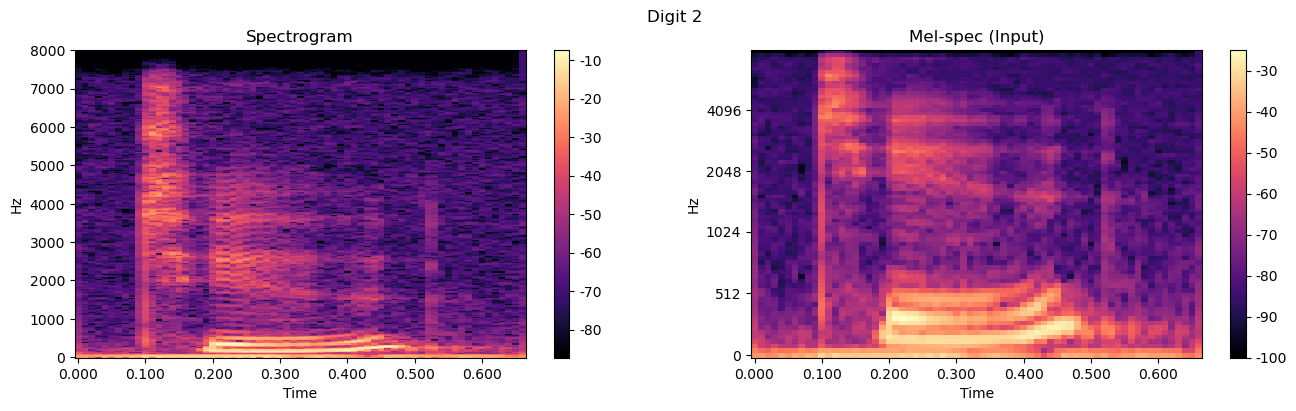

In [57]:
for sample in female_samples:
    plot_spectrogram(sample)

In [61]:
def plot_spectrogram_compare(male_sample, female_sample):
    y, sr = librosa.load(male_sample, sr=SR)
    y_stft = librosa.stft(y=y, n_fft=N_FFT, hop_length=HOP_LENGTH)
    y_spec = np.abs(y_stft) ** 2
    y_log_db = librosa.power_to_db(y_spec)

    digit = male_sample.split('/')[-1].split('_')[0]
    speaker = male_sample.split('/')[-2]
    plt.figure(figsize=(16,4))
    plt.suptitle('Digit %s' % digit)
    plt.subplot(1,2,1)
    librosa.display.specshow(y_log_db,
                            sr=SR,
                            hop_length=HOP_LENGTH,
                            x_axis='time',
                            y_axis='linear')
    plt.colorbar(format='%+2.f')
    plt.title('Male')

    y, sr = librosa.load(female_sample, sr=SR)
    y_stft = librosa.stft(y=y, n_fft=N_FFT, hop_length=HOP_LENGTH)
    y_spec = np.abs(y_stft) ** 2
    y_log_db = librosa.power_to_db(y_spec)

    plt.subplot(1,2,2)
    librosa.display.specshow(y_log_db,
                            sr=SR,
                            hop_length=HOP_LENGTH,
                            x_axis='time',
                            y_axis='linear')
    plt.colorbar(format='%+2.f')
    plt.title('Female')

    if not os.path.exists('fig/' + 'male-female'):
        os.mkdir('fig/' + 'male-female')
    plt.savefig('fig/male-female/%s.png' %(digit))

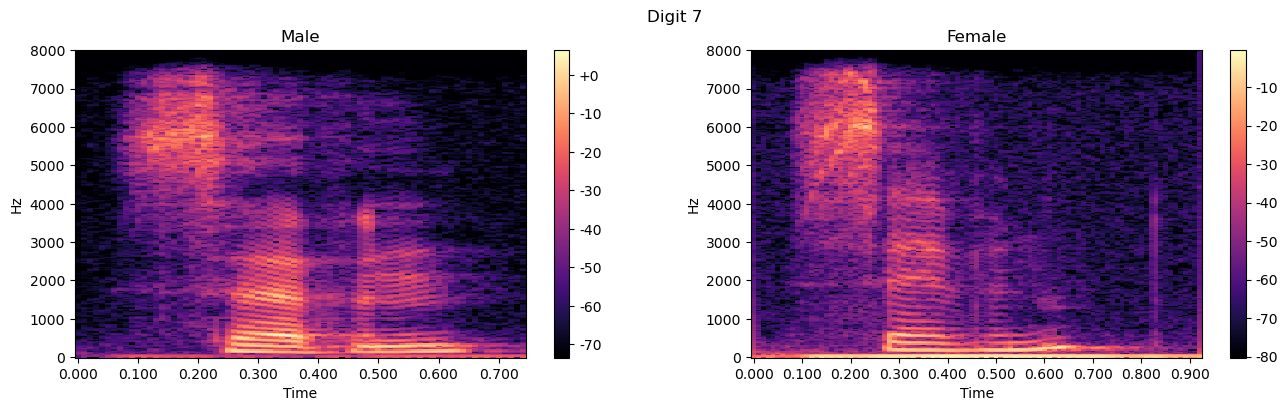

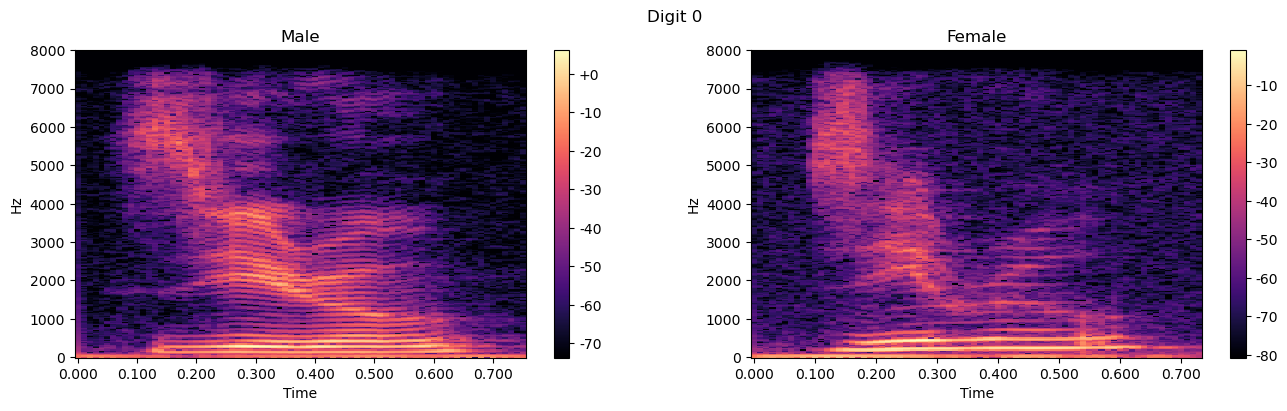

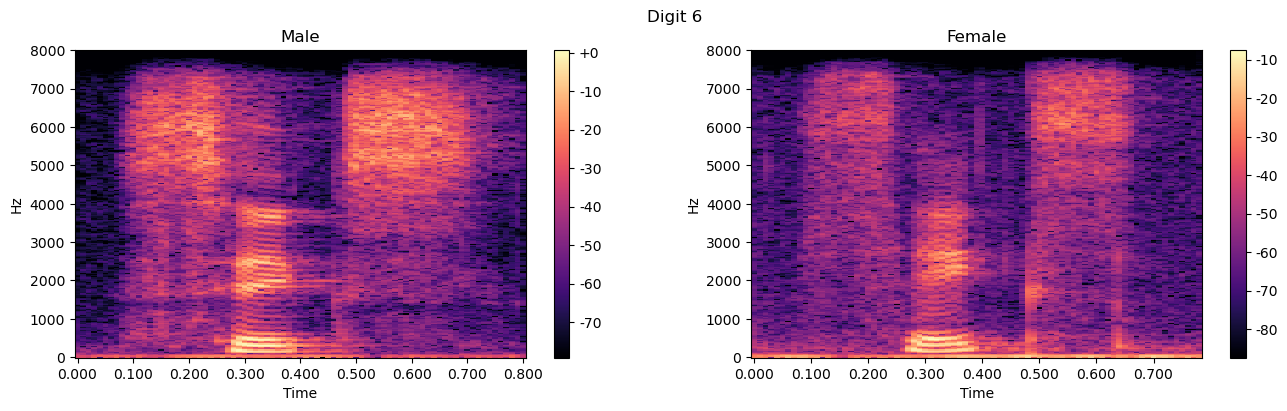

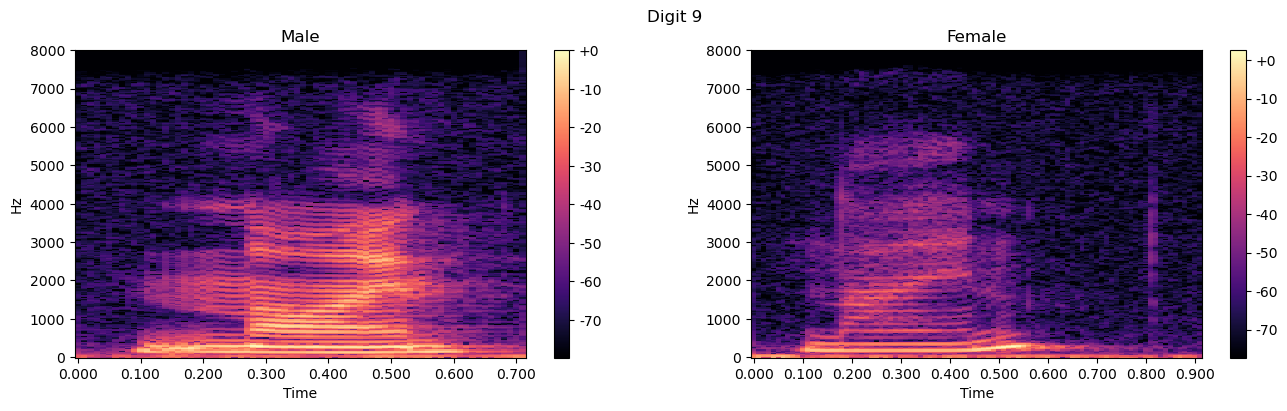

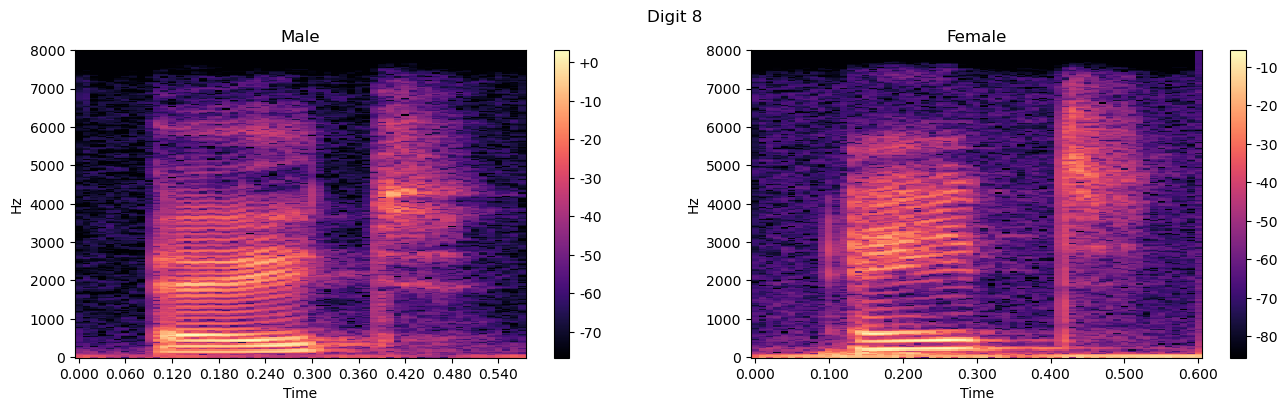

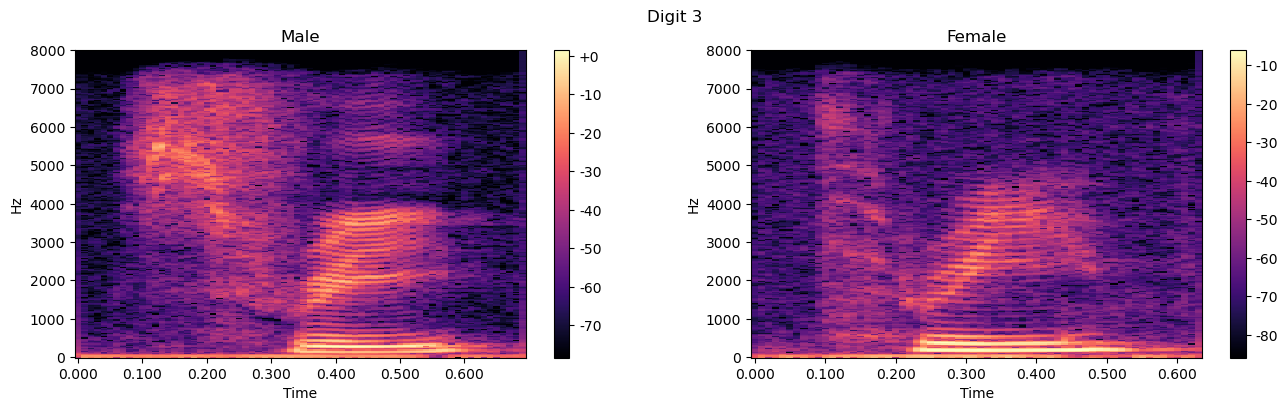

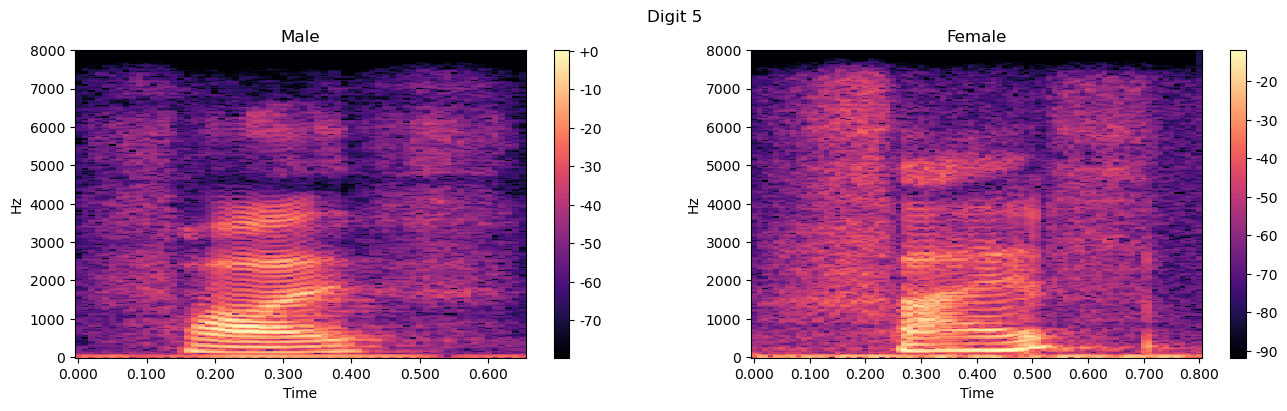

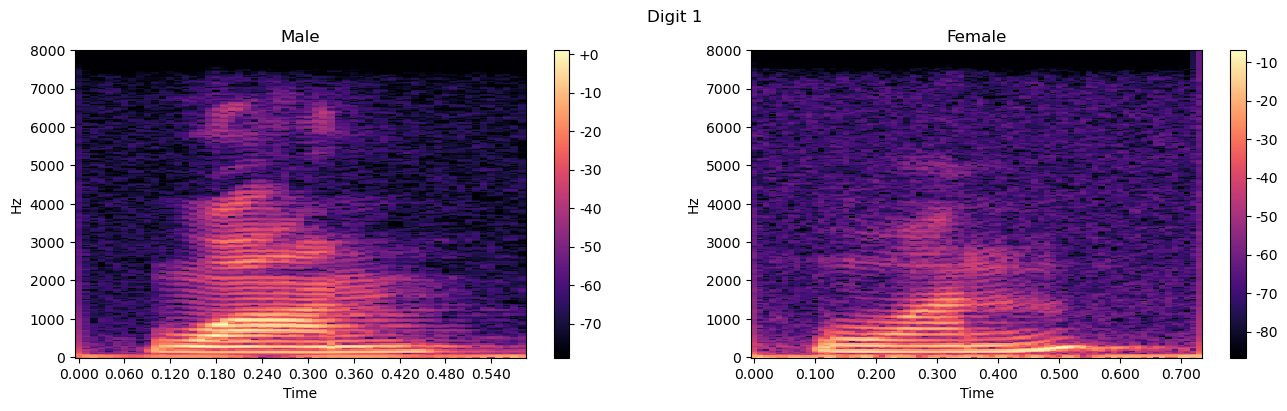

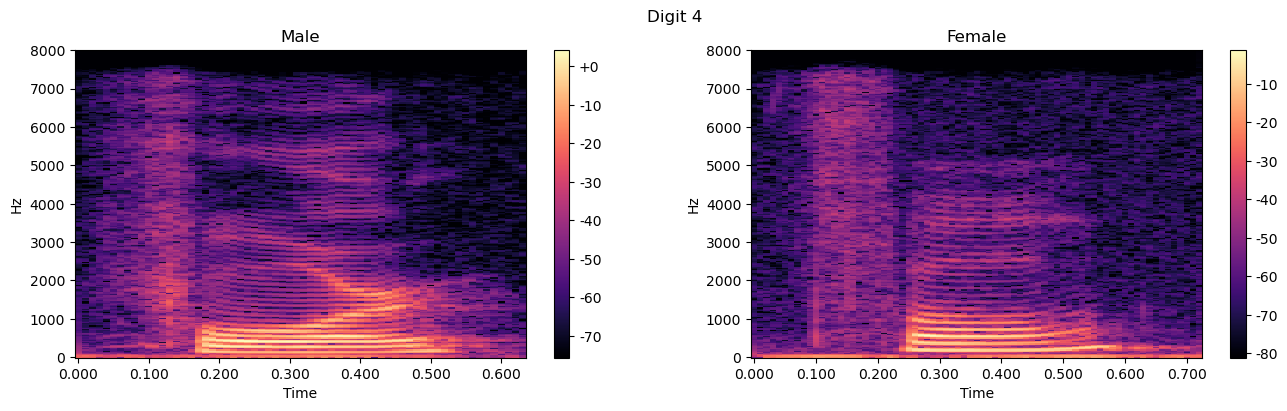

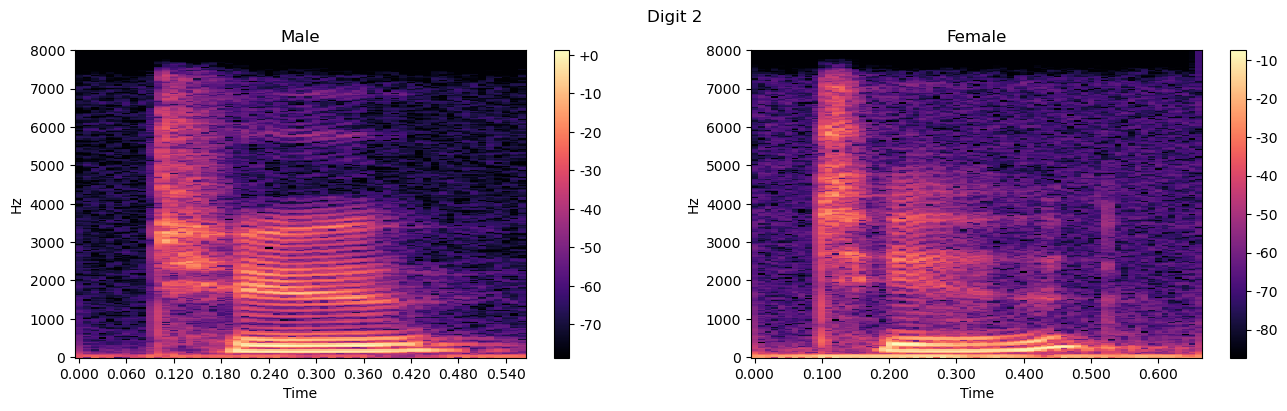

In [62]:
for i in range(len(male_samples)):
    plot_spectrogram_compare(male_samples[i], female_samples[i])

In [63]:
male

'40'